In [1]:
from preprocess.preprocess import load_dataset, compute_label_agg, select_data, sample_class
from preprocess.datasets import PTBDataset

from torch.utils.data import DataLoader, Dataset
import torch

from Augmentation.random_mask import generate_samples_rm
from Augmentation.random_noise import generate_samples_noising

In [2]:
# Define device for torch
use_cuda = True
print("CUDA is available:", torch.cuda.is_available())
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

CUDA is available: True


# Loading dataset of class to be augmented

In [3]:
LOAD_DATASET = True
DATA_PATH = './trainloader.pt' # Stores path to save/load data to augment (only contains the class of interest)
CLS = 'HYP' # Class to augment
BATCH_SIZE = 64

if LOAD_DATASET:
    train_loader = torch.load(DATA_PATH)
else:
    path = './data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/'
        
    data, raw_labels = load_dataset(path)

    labels = compute_label_agg(raw_labels, path)

    data, labels, Y = select_data(data, labels)

    data, labels, Y = sample_class(data, labels, Y, 'HYP')

    ds = PTBDataset(data, labels, Y)

    train_loader = DataLoader(dataset=ds, batch_size=BATCH_SIZE)

    torch.save(train_loader, DATA_PATH)

# Demonstration of random masking augmentation

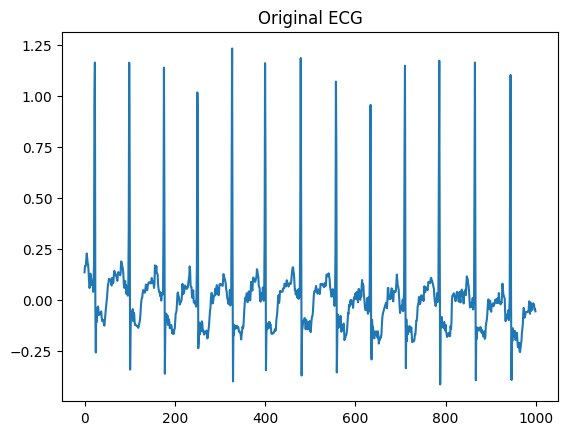

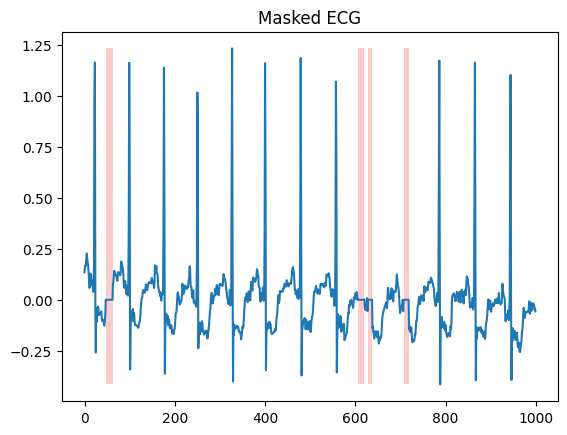

In [4]:
generate_samples_rm(train_loader, visualize=True, max_samples=1)

# Demonstration of random noising augmentation

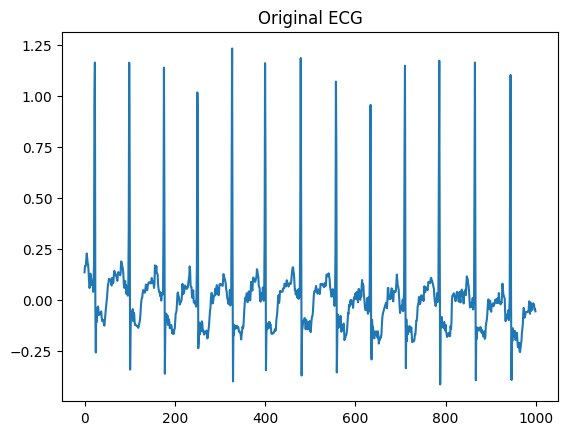

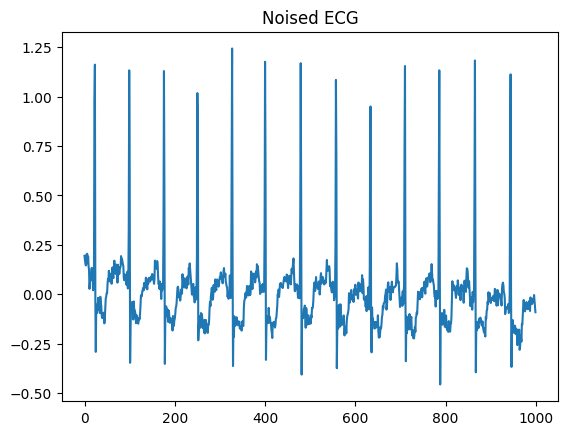

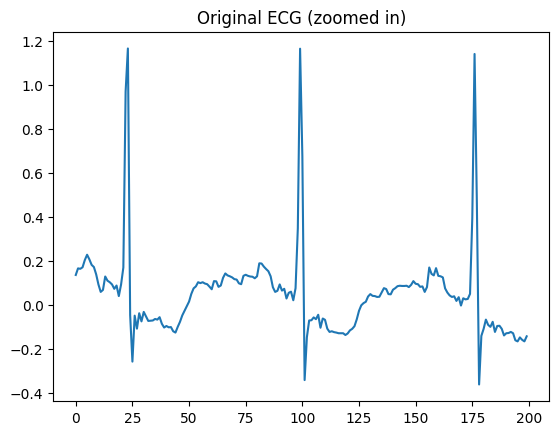

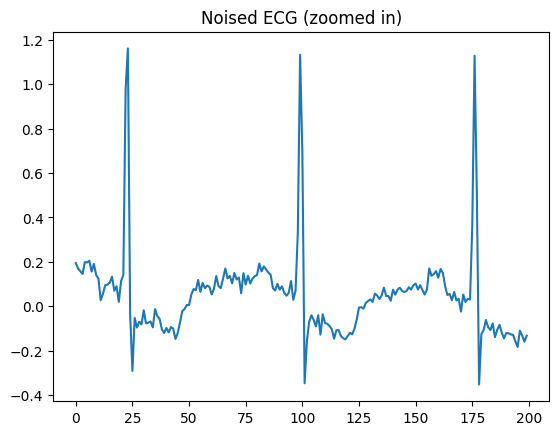

In [5]:
generate_samples_noising(train_loader, BATCH_SIZE, visualize=True, zoom=200, max_samples=1, snr=0.1)